<a href="https://colab.research.google.com/github/ddekun/NLP/blob/lesson2/lesson2/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение в обработку естественного языка

### Урок 2. Создание признакового пространства

Домашнее задание 2 варианта на выбор:
1 вариант (более легкий ) по ссылке https://gbcdn.mrgcdn.ru/uploads/asset/2800508/attachment/447973cb1f55a137a8a7eb4b175f4b47.pdf
2 вариант (рекомендую его, он более объемный, но и больше навыков отрабатывается) по описанию ниже:
все материалы для выполения дз в sem2.ipynb он находится в архиве Lesson-2.zip
для скачивания данных пользуйтесь этими ссылками

https://disk.yandex.ru/i/v5HM-ENiGXZVpQ
https://disk.yandex.ru/i/koR5eMCToCZS2Q

Задание 1.
Задание: обучите три классификатора:

1) на токенах с высокой частотой

2) на токенах со средней частотой

3) на токенах с низкой частотой

Сравните полученные результаты, оцените какие токены наиболее важные для классификации.

Задание 2.
найти фичи с наибольшей значимостью, и вывести их

Задание 3.
1) сравнить count/tf-idf/hashing векторайзеры/полносвязанную сетку (построить classification_report)

2) подобрать оптимальный размер для hashing векторайзера

3) убедиться что для сетки нет переобучения

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [ ]:
# считываем данные и заполняем общий датасет
positive = pd.read_csv('/content/drive/MyDrive/Geekbrains/Introduction to natural language processing/Lesson2/positive.csv', sep=';', usecols=[3], names=['text'])
positive['label'] = ['positive'] * len(positive)
negative = pd.read_csv('/content/drive/MyDrive/Geekbrains/Introduction to natural language processing/Lesson2/positive.csv', sep=';', usecols=[3], names=['text'])
negative['label'] = ['negative'] * len(negative)
df = positive.append(negative)

<ipython-input-2-ae81fc16387e>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = positive.append(negative)


In [ ]:
df.tail()

,text,label
114906,"Спала в родительском доме, на своей кровати......",negative
114907,RT @jebesilofyt: Эх... Мы немного решили сокра...,negative
114908,"Что происходит со мной, когда в эфире #proacti...",negative
114909,"""Любимая,я подарю тебе эту звезду..."" Имя како...",negative
114910,@Ma_che_rie посмотри #непытайтесьпокинутьомск ...,negative


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.text, df.label)

In [ ]:
from sklearn.linear_model import LogisticRegression # можно заменить на любимый классификатор
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from nltk import ngrams

In [ ]:
sent = 'Если б мне платили каждый раз'.split()
list(ngrams(sent, 1)) # униграммы

[('Если',), ('б',), ('мне',), ('платили',), ('каждый',), ('раз',)]

In [ ]:
list(ngrams(sent, 2)) # биграммы

[('Если', 'б'),
 ('б', 'мне'),
 ('мне', 'платили'),
 ('платили', 'каждый'),
 ('каждый', 'раз')]

In [ ]:
list(ngrams(sent, 3)) # триграммы

[('Если', 'б', 'мне'),
 ('б', 'мне', 'платили'),
 ('мне', 'платили', 'каждый'),
 ('платили', 'каждый', 'раз')]

In [ ]:
list(ngrams(sent, 5)) # ... пентаграммы?

[('Если', 'б', 'мне', 'платили', 'каждый'),
 ('б', 'мне', 'платили', 'каждый', 'раз')]

In [ ]:
vec = CountVectorizer(ngram_range=(1, 1))
bow = vec.fit_transform(x_train) # bow -- bag of words (мешок слов)

In [ ]:
list(vec.vocabulary_.items())[:10]

[('wintry_cherry', 71015),
 ('мм', 124660),
 ('из', 108654),
 ('мухосранска', 126326),
 ('красноярска', 116527),
 ('тот', 175241),
 ('самый', 161983),
 ('момент', 125255),
 ('когда', 114073),
 ('ты', 176682)]

In [ ]:
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.17      0.17      0.17     28801
    positive       0.17      0.17      0.17     28655

    accuracy                           0.17     57456
   macro avg       0.17      0.17      0.17     57456
weighted avg       0.17      0.17      0.17     57456



In [ ]:
vec = CountVectorizer(ngram_range=(3, 3))
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    negative       0.20      0.18      0.19     32809
    positive       0.06      0.07      0.07     24647

    accuracy                           0.13     57456
   macro avg       0.13      0.13      0.13     57456
weighted avg       0.14      0.13      0.14     57456



**TF-IDF векторизация**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vec = TfidfVectorizer(ngram_range=(1, 1))
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    negative       0.17      0.17      0.17     28760
    positive       0.17      0.17      0.17     28696

    accuracy                           0.17     57456
   macro avg       0.17      0.17      0.17     57456
weighted avg       0.17      0.17      0.17     57456



**PMI**

In [ ]:
import nltk
from nltk import collocations
nltk.download('genesis')

print(type(nltk.corpus.genesis.words('english-web.txt')))
bigram_measures = collocations.BigramAssocMeasures()
# bigram_finder.apply_freq_filter(5)
bigram_finder = collocations.BigramCollocationFinder.from_documents([nltk.word_tokenize(x) for x in x_train])
bigrams = bigram_finder.nbest(bigram_measures.pmi, 100)
print(bigrams)

In [ ]:
bigrams = bigram_finder.nbest(bigram_measures.likelihood_ratio, 100)
print(bigrams)

**Стоп-слова и пунктуация**

Стоп-слова -- это слова, которые часто встречаются практически в любом тексте и ничего интересного не говорят о конретном документе, то есть играют роль шума. Поэтому их принято убирать. По той же причине убирают и пунктуацию.

In [ ]:
# у вас здесь, вероятно, выскочит ошибка и надо будет загрузить стоп слова (в тексте ошибки написано, как)
from nltk.corpus import stopwords
nltk.download('stopwords')
print(stopwords.words('russian'))

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
noise = stopwords.words('russian') + list(punctuation)

In [ ]:
from nltk.tokenize import word_tokenize

vec = CountVectorizer(ngram_range=(1, 1), tokenizer=word_tokenize, stop_words=noise)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

**Pymorphy**

In [ ]:
!pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 23.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=5cceb73681804367fa5e2ccd3425bdb5536e7c200047c7bd05222bdd3bed269b
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
from pymorphy2 import MorphAnalyzer
pymorphy2_analyzer = MorphAnalyzer()

In [ ]:
ana = pymorphy2_analyzer.parse(sent[3])
ana

[Parse(word='платили', tag=OpencorporaTag('VERB,impf,tran plur,past,indc'), normal_form='платить', score=1.0, methods_stack=((DictionaryAnalyzer(), 'платили', 2472, 10),))]

In [ ]:
ana[0].normal_form

'платить'

**Natasha**

In [ ]:
!pip install razdel

In [ ]:
from razdel import tokenize

tokens = list(tokenize('Кружка-термос на 0.5л (50/64 см³, 516;...)'))
tokens

[Substring(0, 13, 'Кружка-термос'),
 Substring(14, 16, 'на'),
 Substring(17, 20, '0.5'),
 Substring(20, 21, 'л'),
 Substring(22, 23, '('),
 Substring(23, 28, '50/64'),
 Substring(29, 32, 'см³'),
 Substring(32, 33, ','),
 Substring(34, 37, '516'),
 Substring(37, 38, ';'),
 Substring(38, 41, '...'),
 Substring(41, 42, ')')]

In [ ]:
[_.text for _ in tokens]

['Кружка-термос',
 'на',
 '0.5',
 'л',
 '(',
 '50/64',
 'см³',
 ',',
 '516',
 ';',
 '...',
 ')']

In [ ]:
!pip install natasha

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26099 sha256=6165b6ccf751e550f3a73718a366253a1e8f13315238d351534c0c71b5701fbf
  Stored in directory: /root/.cache/pip/wheels/fa/80/8c/43488a924a046b733b64de3fac99252674c892a4c3801c0a61
Successfully built intervaltree


In [ ]:
from natasha import Doc, MorphVocab, Segmenter, NewsEmbedding, NewsMorphTagger

segmenter = Segmenter()
morph_vocab = MorphVocab()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)

def natasha_lemmatize(text):
    doc = Doc(text)
    doc.segment(segmenter)
    doc.tag_morph(morph_tagger)
    for token in doc.tokens:
        token.lemmatize(morph_vocab)
    return {_.text: _.lemma for _ in doc.tokens}

In [ ]:
text = 'Посол Израиля на Украине Йоэль Лион признался, что пришел в шок, узнав о решении властей Львовской области объявить 2019 год годом лидера запрещенной в России Организации украинских националистов (ОУН) Степана Бандеры. Свое заявление он разместил в Twitter. «Я не могу понять, как прославление тех, кто непосредственно принимал участие в ужасных антисемитских преступлениях, помогает бороться с антисемитизмом и ксенофобией. Украина не должна забывать о преступлениях, совершенных против украинских евреев, и никоим образом не отмечать их через почитание их исполнителей», — написал дипломат. 11 декабря Львовский областной совет принял решение провозгласить 2019 год в регионе годом Степана Бандеры в связи с празднованием 110-летия со дня рождения лидера ОУН (Бандера родился 1 января 1909 года). В июле аналогичное решение принял Житомирский областной совет. В начале месяца с предложением к президенту страны Петру Порошенко вернуть Бандере звание Героя Украины обратились депутаты Верховной Рады. Парламентарии уверены, что признание Бандеры национальным героем поможет в борьбе с подрывной деятельностью против Украины в информационном поле, а также остановит «распространение мифов, созданных российской пропагандой». Степан Бандера (1909-1959) был одним из лидеров Организации украинских националистов, выступающей за создание независимого государства на территориях с украиноязычным населением. В 2010 году в период президентства Виктора Ющенко Бандера был посмертно признан Героем Украины, однако впоследствии это решение было отменено судом. '

natasha_lemmatize(text)

{'Посол': 'посол',
 'Израиля': 'израиль',
 'на': 'на',
 'Украине': 'украина',
 'Йоэль': 'йоэль',
 'Лион': 'лион',
 'признался': 'признаться',
 ',': ',',
 'что': 'что',
 'пришел': 'прийти',
 'в': 'в',
 'шок': 'шок',
 'узнав': 'узнать',
 'о': 'о',
 'решении': 'решение',
 'властей': 'власть',
 'Львовской': 'львовский',
 'области': 'область',
 'объявить': 'объявить',
 '2019': '2019',
 'год': 'год',
 'годом': 'год',
 'лидера': 'лидер',
 'запрещенной': 'запретить',
 'России': 'россия',
 'Организации': 'организация',
 'украинских': 'украинский',
 'националистов': 'националист',
 '(': '(',
 'ОУН': 'оун',
 ')': ')',
 'Степана': 'степан',
 'Бандеры': 'бандера',
 '.': '.',
 'Свое': 'свой',
 'заявление': 'заявление',
 'он': 'он',
 'разместил': 'разместить',
 'Twitter': 'twitter',
 '«': '«',
 'Я': 'я',
 'не': 'не',
 'могу': 'мочь',
 'понять': 'понять',
 'как': 'как',
 'прославление': 'прославление',
 'тех': 'тот',
 'кто': 'кто',
 'непосредственно': 'непосредственно',
 'принимал': 'принимать',
 'уча

**Словарь, закон Ципфа и закон Хипса**

Закон Ципфа -- эмпирическая закономерность: если все слова корпуса текста упорядочить по убыванию частоты их использования, то частота n-го слова в таком списке окажется приблизительно обратно пропорциональной его порядковому номеру n. Иными словами, частотность слов убывает очень быстро.

In [ ]:
from collections import Counter

In [ ]:
corpus = [token for tweet in df.text for token in word_tokenize(tweet) if token not in punctuation]
print(len(corpus))
corpus[:10]

2993652


['first_timee', 'хоть', 'я', 'и', 'школота', 'но', 'поверь', 'у', 'нас', 'то']

In [ ]:
freq_dict = Counter(corpus)
freq_dict_sorted= sorted(freq_dict.items(), key=lambda x: -x[1])
list(freq_dict_sorted)[:10]

[('и', 58672),
 ('не', 54862),
 ('в', 54194),
 ('я', 49296),
 ('http', 44944),
 ('RT', 44070),
 ('на', 37048),
 ('D', 33020),
 ('с', 30626),
 ('что', 30440)]

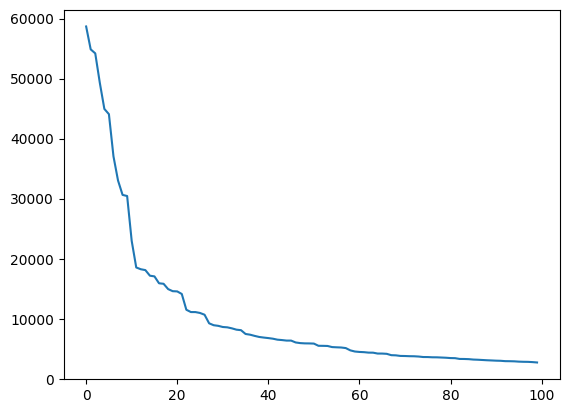

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
first_100_freqs = [freq for word, freq in freq_dict_sorted[:100]]
plt.plot(first_100_freqs)
plt.show()

Задание 1.

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
my_stopwords = stopwords.words('russian')
# noise = stopwords.words('russian') + list(punctuation)
noise = stopwords.words('russian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df

,text,label
0,"@first_timee хоть я и школота, но поверь, у на...",positive
1,"Да, все-таки он немного похож на него. Но мой ...",positive
2,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...,positive
3,"RT @digger2912: ""Кто то в углу сидит и погибае...",positive
4,@irina_dyshkant Вот что значит страшилка :D\nН...,positive
...,...,...
114906,"Спала в родительском доме, на своей кровати......",negative
114907,RT @jebesilofyt: Эх... Мы немного решили сокра...,negative
114908,"Что происходит со мной, когда в эфире #proacti...",negative
114909,"""Любимая,я подарю тебе эту звезду..."" Имя како...",negative


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.text, df.label)

In [ ]:
def get_tokens_importance(maxdf, mindf):

    tfidf_vect = TfidfVectorizer(max_df=maxdf, # не берем слова что выше тресхолда
                                 min_df=mindf, # не берем что ниже тресхолда
#                                  max_features=1000,
#                                  stop_words=noise,
                                 )

    bow = tfidf_vect.fit_transform(x_train)
    clf = LogisticRegression(random_state=42)
    clf.fit(bow, y_train)

    pred = clf.predict(tfidf_vect.transform(x_test))
    print(f'max_df= {maxdf} min_df= {mindf}')

In [ ]:
# Берем все токены - f1-score получается низкая
get_tokens_importance(1, 1)

max_df= 1 min_df= 1


In [ ]:
# Берем токены часто встречающиеся
get_tokens_importance(1.0, 0.285)

In [ ]:
# Берем токены средне встречающиеся
get_tokens_importance(0.7, 0.15)

In [ ]:
# Берем токены низкочастотные
get_tokens_importance(0.3, 1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


max_df= 0.3 min_df= 1


**Задание 2.**

In [ ]:
from collections import Counter

In [ ]:
# corpus = [token for tweet in df.text for token in word_tokenize(tweet) if token not in punctuation]
corpus = [token for tweet in df.text for token in word_tokenize(tweet)]
print(len(corpus))
corpus[:10]

4218946


['@', 'first_timee', 'хоть', 'я', 'и', 'школота', ',', 'но', 'поверь', ',']

In [ ]:
freq_dict = Counter(corpus)
freq_dict_sorted= sorted(freq_dict.items(), key=lambda x: -x[1])
list(freq_dict_sorted)[:10]

[(')', 388010),
 (':', 206624),
 (',', 194918),
 ('@', 177808),
 ('!', 73210),
 ('и', 58672),
 ('.', 56264),
 ('не', 54862),
 ('в', 54194),
 ('я', 49296)]

In [ ]:
cool_token = '!'
pred = ['positive' if cool_token in tweet else 'negative' for tweet in x_test]
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.83      0.50      0.62     47723
    positive       0.17      0.50      0.25      9733

    accuracy                           0.50     57456
   macro avg       0.50      0.50      0.44     57456
weighted avg       0.72      0.50      0.56     57456



In [ ]:
cool_token = ':'
pred = ['positive' if cool_token in tweet else 'negative' for tweet in x_test]
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.39      0.50      0.44     22539
    positive       0.61      0.50      0.55     34917

    accuracy                           0.50     57456
   macro avg       0.50      0.50      0.50     57456
weighted avg       0.52      0.50      0.51     57456



In [ ]:
cool_token = ')'
pred = ['positive' if cool_token in tweet else 'negative' for tweet in x_test]
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.17      0.50      0.25      9808
    positive       0.83      0.50      0.63     47648

    accuracy                           0.50     57456
   macro avg       0.50      0.50      0.44     57456
weighted avg       0.72      0.50      0.56     57456



**Символьные n-граммы**

In [ ]:
vec = CountVectorizer(analyzer='char', ngram_range=(1, 1))
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    negative       0.51      0.48      0.50     30019
    positive       0.46      0.49      0.47     27437

    accuracy                           0.49     57456
   macro avg       0.49      0.49      0.49     57456
weighted avg       0.49      0.49      0.49     57456



**Задание 3.**

In [ ]:
%%time

count_vect = CountVectorizer()
bow = count_vect.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)

pred = clf.predict(count_vect.transform(x_test))
print(classification_report(pred, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    negative       0.15      0.15      0.15     27803
    positive       0.18      0.18      0.18     29653

    accuracy                           0.16     57456
   macro avg       0.16      0.16      0.16     57456
weighted avg       0.16      0.16      0.16     57456

CPU times: user 24.3 s, sys: 10 s, total: 34.4 s
Wall time: 41.9 s


In [ ]:
%%time

tfidf_vect = TfidfVectorizer()
bow = tfidf_vect.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)

pred = clf.predict(tfidf_vect.transform(x_test))
print(classification_report(pred, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    negative       0.18      0.18      0.18     28766
    positive       0.18      0.18      0.18     28690

    accuracy                           0.18     57456
   macro avg       0.18      0.18      0.18     57456
weighted avg       0.18      0.18      0.18     57456

CPU times: user 20.8 s, sys: 12.5 s, total: 33.2 s
Wall time: 25.9 s


In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer

In [ ]:
%%time

feature_sizes = [100, 1000, 10000, 100000, 1000000]

for feature_size in feature_sizes:

    h_vect = HashingVectorizer(n_features=feature_size)
    h_vect.fit(x_train)

    xtrain_count =  h_vect.transform(x_train)
    xtest_count =  h_vect.transform(x_test)

    classifier = linear_model.LogisticRegression()
    classifier.fit(xtrain_count, y_train)
    predictions = classifier.predict(xtest_count)
    #predictions
    print(f'Длина hash-вектора: {feature_size}')
    print(classification_report(predictions, y_test))

In [ ]:
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D, Conv1D, GRU, LSTM, Dropout
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization # формирует словарь как CountVect и TF-IDF
# из унгикальных токенов и заменяет кажддый токен его айдишником

In [ ]:
# Привеедм y к 0,1

encoder = preprocessing.LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

In [ ]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
valid_data = tf.data.Dataset.from_tensor_slices((x_test, y_test))

In [ ]:
train_data = train_data.batch(16)
valid_data = valid_data.batch(16)

In [ ]:
for raw in train_data.take(1):
    pass

In [ ]:
raw

In [ ]:
def custom_standardization(input_data):

    return input_data

vocab_size = 10000 # выбрали 10000 а там было 31к
seq_len = 100 # сколько токенов в тексте -проходят по всем текстам и выбирают максимум, или берут квантильное -
# могут быть выбросы по длинам

vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=vocab_size,
    output_mode='int', # что каждый токен будем переводить в индекс относительно нашего словаря vocab_size
    output_sequence_length=seq_len)

# Make a text-only dataset (no labels) and call adapt to build the vocabulary.
text_data = train_data.map(lambda x, y: x)
vectorize_layer.adapt(text_data)

embedding_dim=200 # 200-мерные вектора будут у каждого токена

In [ ]:
class myNet(tf.keras.Model):
    def __init__(self):
        super(myNet, self).__init__()
        self.emb = Embedding(vocab_size, embedding_dim, name="embedding")
        self.conv1 = Conv1D(200, (3))
        self.conv2 = Conv1D(200, (3))
        self.gPool = GlobalAveragePooling1D()
        self.fc1 = Dense(100, activation='relu')
        self.fc2 = Dense(1)


    def call(self, x):
        x = vectorize_layer(x)
        x = self.emb(x)
        x1 = self.conv1(x)
        x = self.conv2(x)
        x = self.gPool((x + x1)/2)
        x = self.fc1(x)
#         x = self.ss(x)
        return self.fc2(x)

# тут подход что все выделено в класс - ти удобнее писать в таком подходе!!!!
# так как еслп будут повторться слои

In [ ]:
mmodel = myNet()

In [ ]:
mmodel.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
mmodel.fit(train_data, validation_data=valid_data, epochs=5)

In [ ]:
preds = mmodel.predict(valid_data)

In [ ]:
preds

In [ ]:
# Приведем preds в бинарный вид
preds = [int(i[0]>0) for i in preds]

In [ ]:
# pred = clf.predict(tfidf_vect.transform(x_test))
print(classification_report(preds, y_test))